### Analysis of the correlation between Stock Markets and Elections

After getting a first look at the data in the Introduction, it follows the Main part of our analysis. We look at investment returns over time, political spectrum, countries and depending on how close the election was. It follows a comparison of average yearly returns versus election yeras. The project will finish with a market prediction depending on the election prediction. 

In [87]:
# import libraries
import numpy as np
import pandas as pd
# from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

At first we prepare the data to work with

In [88]:
# The following steps to prepare the data to work with are the same as in the introduction

elec_data_file = r"C:\Users\berni\OneDrive\Dokumente\Python_Projects\Elections_Project\Election_Data_V3.xlsx" # please insert your path here
elec_data_unfiltered = pd.read_excel(elec_data_file, usecols="A:G")
elec_data_unfiltered['Date'] = pd.to_datetime(elec_data_unfiltered['Date'], errors='raise') 

last_25_years = pd.to_datetime('today') - pd.DateOffset(years=25)
election_data = elec_data_unfiltered[elec_data_unfiltered['Date'] > last_25_years].copy()

spectrum_mapping = {"left": -2, "centre-left": -1, "centre": 0, "centre-right": 1, "right": 2}
election_data["Spec_Index"] = election_data["Spectrum"].map(spectrum_mapping)
stock_mapping = {'UK':'^FTSE', 'Germany':'^GDAXI', 'Italy':'FTSEMIB.MI', 'France':'^FCHI', 'Spain':'^IBEX'}
election_data['Stock Index'] = election_data['Country'].map(stock_mapping)

election_data = election_data[['Date','Country','Stock Index','Spectrum','Spec_Index','Close','Party','Share','Winner']]

In [89]:
# Adding a Start and End Date to the election_data for a one year range around the elections
def calculate_time_frame(election_date):
    start_date = election_date - pd.DateOffset(months=6)
    end_date = election_date + pd.DateOffset(months=6) # + MonthEnd(0)  Ensure the end date is the end of the month
    return start_date, end_date

election_data['Start Date'], election_data['End Date'] = zip(*election_data['Date'].apply(calculate_time_frame))

election_data.head(10)


,Date,Country,Stock Index,Spectrum,Spec_Index,Close,Party,Share,Winner,Start Date,End Date
0,2021-09-26,Germany,^GDAXI,centre-left,-1,Yes,SPD,25.7,Scholz,2021-03-26,2022-03-26
1,2017-09-24,Germany,^GDAXI,centre,0,No,CDU,32.9,Merkel,2017-03-24,2018-03-24
2,2013-09-22,Germany,^GDAXI,centre,0,No,CDU,41.5,Merkel,2013-03-22,2014-03-22
3,2009-09-27,Germany,^GDAXI,centre-right,1,No,CDU,33.8,Merkel,2009-03-27,2010-03-27
4,2005-09-18,Germany,^GDAXI,centre,0,No,CDU,35.2,Merkel,2005-03-18,2006-03-18
5,2002-09-22,Germany,^GDAXI,centre-left,-1,Yes,SPD,38.5,Schroeder,2002-03-22,2003-03-22
12,2019-12-12,UK,^FTSE,centre-right,1,No,Tories,43.6,Johnson,2019-06-12,2020-06-12
13,2017-06-08,UK,^FTSE,centre-right,1,No,Tories,42.3,May,2016-12-08,2017-12-08
14,2015-05-07,UK,^FTSE,centre-right,1,Yes,Tories,36.8,Cameron,2014-11-07,2015-11-07
15,2010-05-06,UK,^FTSE,centre-right,1,Yes,Tories,36.1,Cameron,2009-11-06,2010-11-06


In [90]:
# Creating a function in order to create stock_data - filtering only the stocks we need
def fetch_stock_data(ticker, start_date, end_date):
    """
    Fetches historical stock data from Yahoo Finance.

    :param ticker: The stock ticker symbol.
    :param start_date: The start date for the data.
    :param end_date: The end date for the data.
    :return: A DataFrame with the stock data.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [91]:
# Defining a function in order to calculate returns
def calculate_return(stock_data):
    """
    Calculates the return of an investment.

    :param stock_data: A DataFrame with the stock data.
    :return: The return of the investment.
    """
    if not stock_data.empty and 'Adj Close' in stock_data.columns:
        # The return is calculated based on the adjusted closing price
        start_price = stock_data['Adj Close'].iloc[0]
        end_price = stock_data['Adj Close'].iloc[-1]
        return (end_price - start_price) / start_price
    else:
        return None

In [92]:
# Using our functions in order to add to election_data investment plans
election_data['Investment Return'] = None

for index, row in election_data.iterrows():
    stock_index = row['Stock Index']
    start_date = row['Start Date']
    end_date = row['End Date']
    
    if pd.notnull(stock_index):
        stock_data = fetch_stock_data(stock_index, start_date, end_date)
        investment_return = calculate_return(stock_data)
        election_data.at[index, 'Investment Return'] = investment_return

election_data.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Date,Country,Stock Index,Spectrum,Spec_Index,Close,Party,Share,Winner,Start Date,End Date,Investment Return
0,2021-09-26,Germany,^GDAXI,centre-left,-1,Yes,SPD,25.7,Scholz,2021-03-26,2022-03-26,-0.030048
1,2017-09-24,Germany,^GDAXI,centre,0,No,CDU,32.9,Merkel,2017-03-24,2018-03-24,-0.014751
2,2013-09-22,Germany,^GDAXI,centre,0,No,CDU,41.5,Merkel,2013-03-22,2014-03-22,0.180954
3,2009-09-27,Germany,^GDAXI,centre-right,1,No,CDU,33.8,Merkel,2009-03-27,2010-03-27,0.455924
4,2005-09-18,Germany,^GDAXI,centre,0,No,CDU,35.2,Merkel,2005-03-18,2006-03-18,0.359403
5,2002-09-22,Germany,^GDAXI,centre-left,-1,Yes,SPD,38.5,Schroeder,2002-03-22,2003-03-22,-0.494038
12,2019-12-12,UK,^FTSE,centre-right,1,No,Tories,43.6,Johnson,2019-06-12,2020-06-12,-0.175213
13,2017-06-08,UK,^FTSE,centre-right,1,No,Tories,42.3,May,2016-12-08,2017-12-08,0.056149
14,2015-05-07,UK,^FTSE,centre-right,1,Yes,Tories,36.8,Cameron,2014-11-07,2015-11-07,-0.032495
15,2010-05-06,UK,^FTSE,centre-right,1,Yes,Tories,36.1,Cameron,2009-11-06,2010-11-06,0.142474


In [108]:
# Group by 'Country' and 'Close' and calculate relevant statistics
grouped_stats = election_data.groupby(['Country','Close'])['Investment Return'].agg(['mean','std','count','min','max'])

grouped_stats.rename(columns={'mean': 'Average Return', 'std': 'Standard Deviation', 'count': 'Number of Elections',
                               'min': 'Minimum Return', 'max': 'Maximum Return'}, inplace=True)

grouped_stats

Average Return  Standard Deviation  Number of Elections  \
Country Close                                                            
France  No          -0.024151            0.220084                    4   
        Yes          0.111129                 NaN                    1   
Germany No           0.245382            0.207484                    4   
        Yes         -0.262043            0.328090                    2   
Italy   No          -0.225554            0.347450                    3   
        Yes          0.049476            0.111171                    3   
Spain   No          -0.131871            0.193366                    5   
        Yes          0.017409            0.190835                    4   
UK      No          -0.028266            0.153392                    4   
        Yes          0.054989            0.123721                    2   

               Minimum Return  Maximum Return  
Country Close                                  
France  No          -0.282402        0.234475  
        Yes          0.111129        0.111129  
Germany No          -0.014751        0.455924  
        Yes         -0.494038       -0.030048  
Italy   No          -0.499124        0.165379  
        Yes         -0.064017        0.158169  
Spain   No          -0.357880        0.132150  
        Yes         -0.264439        0.150547  
UK      No          -0.175213        0.144268  
        Yes         -0.032495        0.142474

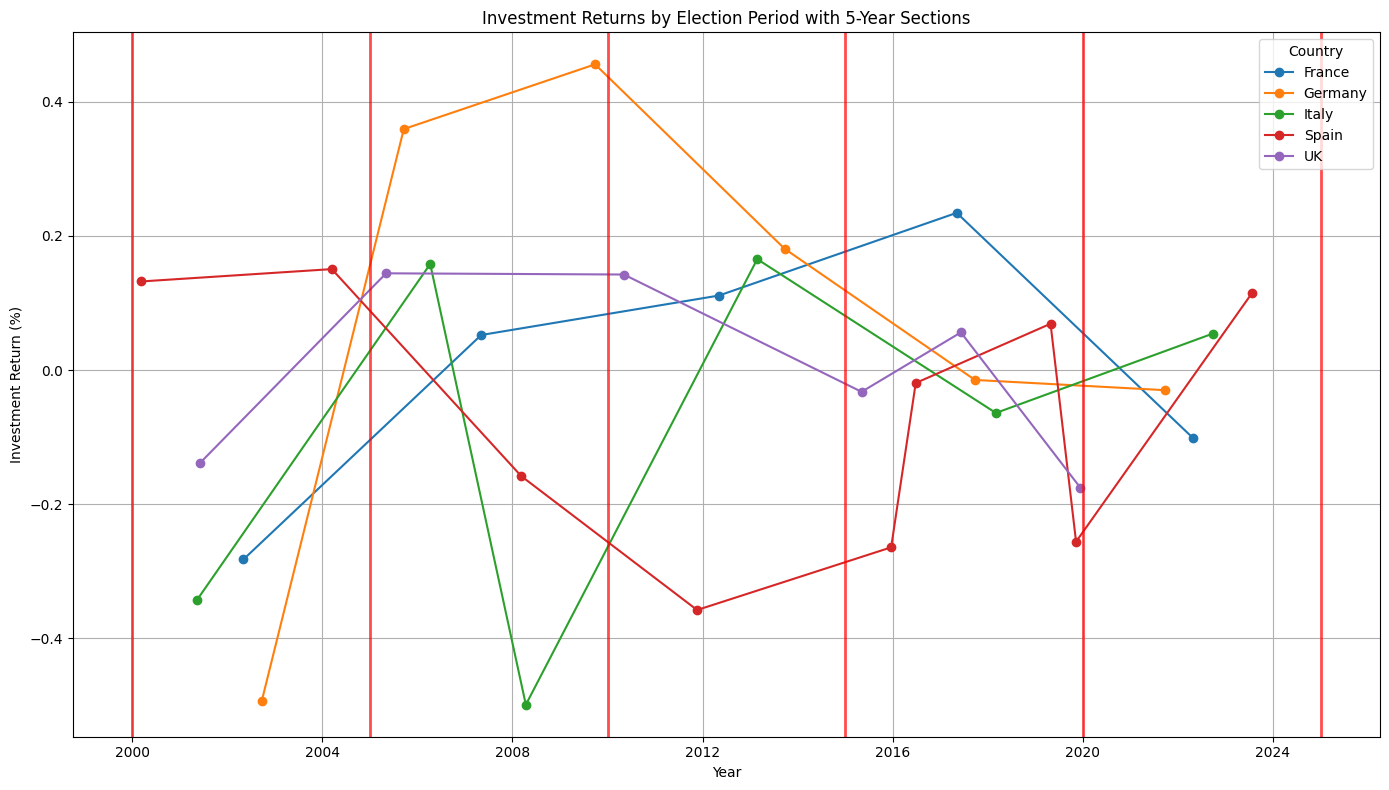

In [109]:
# Visualization : using our DataFrames in order to check our thesis
election_data['Date'] = pd.to_datetime(election_data['Date'])

election_data['Investment Return'] = pd.to_numeric(election_data['Investment Return'], errors='coerce')

# Visualization 1: Investment Returns Over Time with Lines and 5-Year Sections
plt.figure(figsize=(14, 8))
for country in sorted(election_data['Country'].unique()):
    country_data = election_data[election_data['Country'] == country].sort_values('Date')
    plt.plot(country_data['Date'], country_data['Investment Return'], marker='o', linestyle='-', label=country)

start_year = election_data['Date'].dt.year.min()
end_year = election_data['Date'].dt.year.max()

years = np.arange(start_year, end_year + 5, 5)

for year in years:
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='red', linestyle='-', alpha=0.7, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Investment Return (%)')
plt.title('Investment Returns by Election Period with 5-Year Sections')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()  
plt.show()

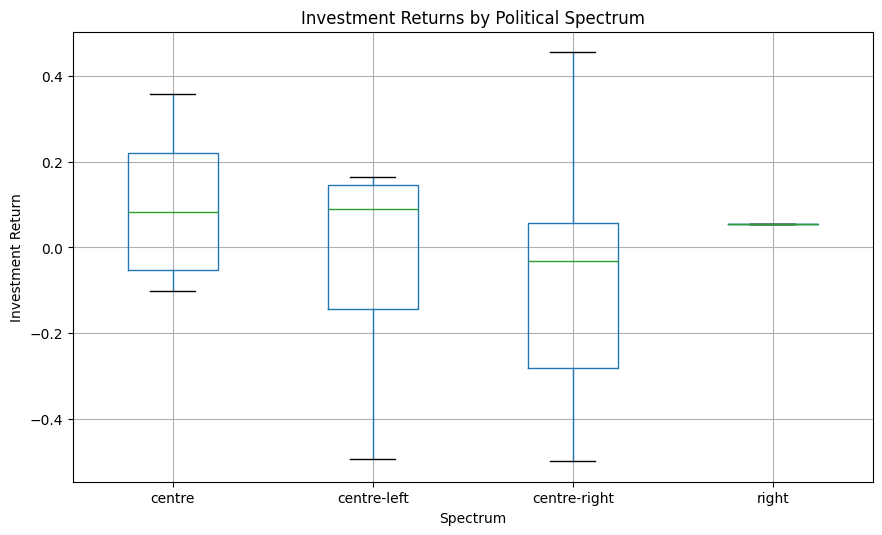

In [110]:
# Visualization 2: Investment Returns by Political Spectrum
election_data.boxplot(by='Spectrum', column='Investment Return', figsize=(10, 6))
plt.ylabel('Investment Return')
plt.title('Investment Returns by Political Spectrum')
plt.suptitle('')
plt.show()

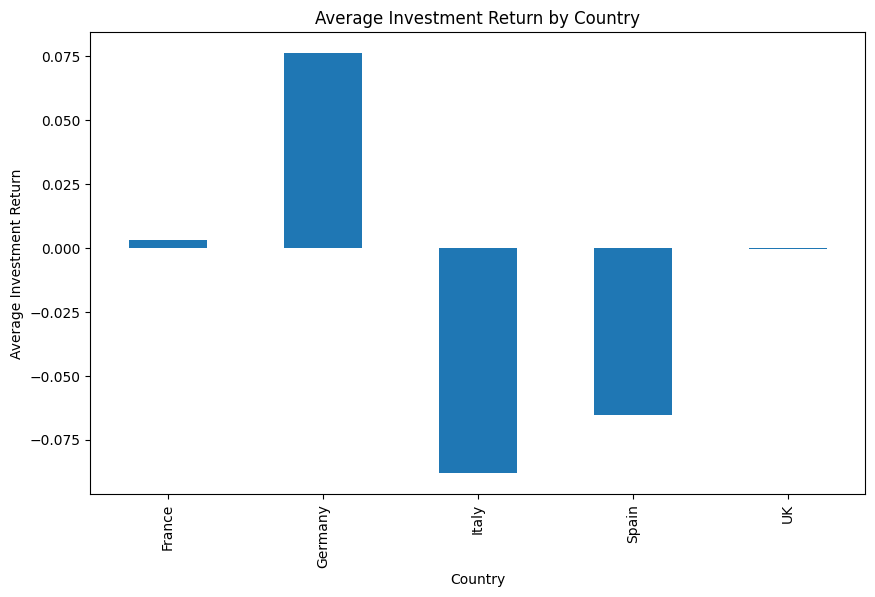

In [111]:
# Visualization 3: Average Investment Return by Country
average_returns = election_data.groupby('Country')['Investment Return'].mean()
average_returns.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Average Investment Return')
plt.title('Average Investment Return by Country')
plt.show()

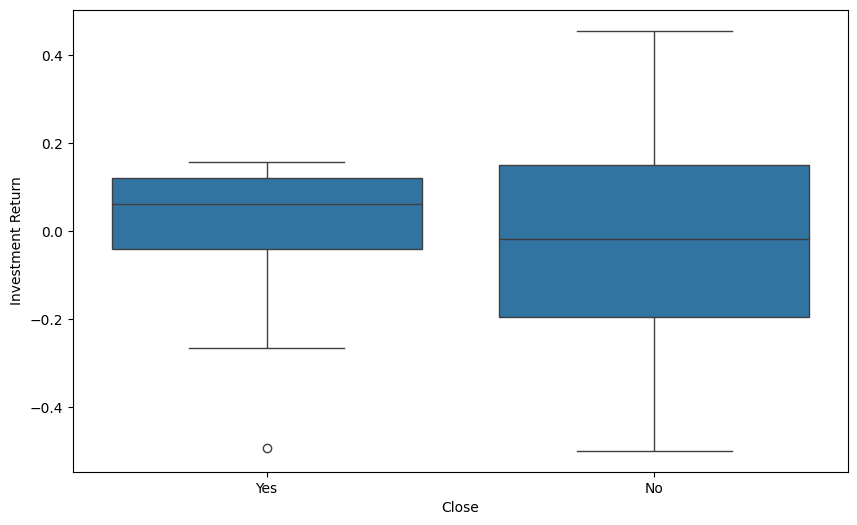

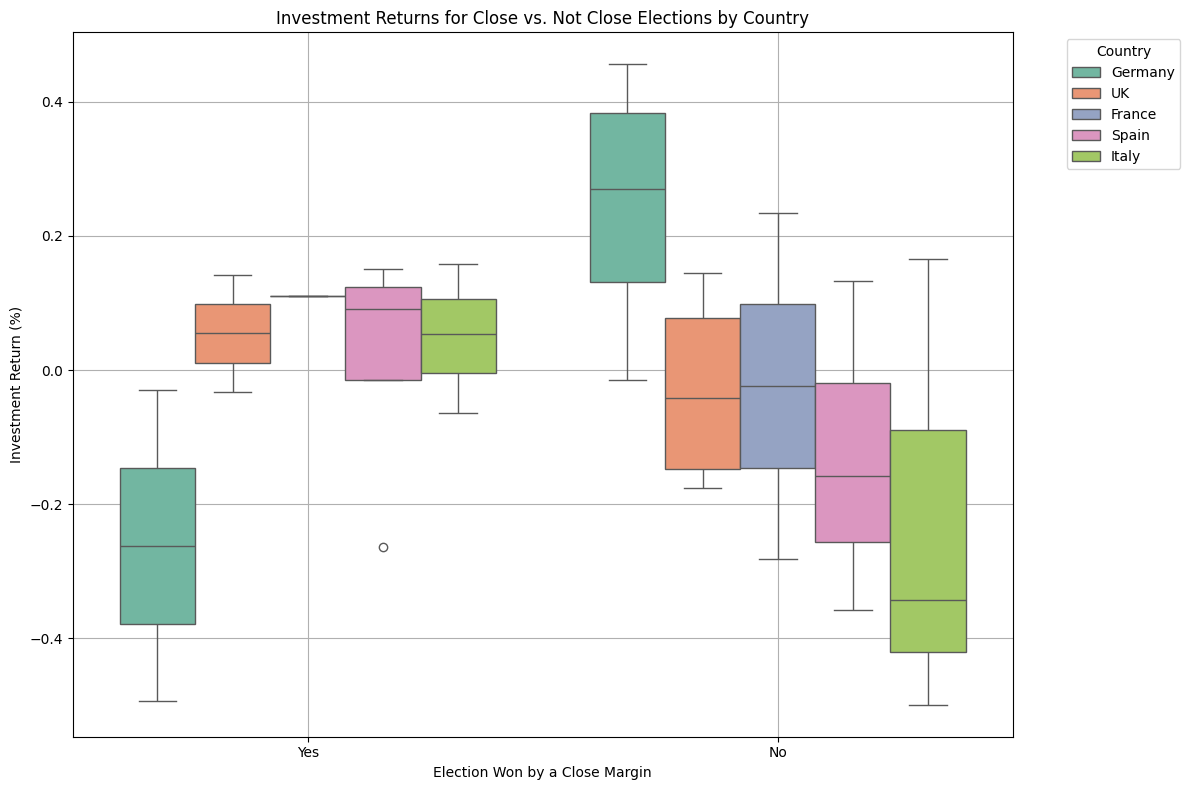

In [112]:
# Visualization 4: Investment Returns for Close vs. Not Close Elections
plt.figure(figsize=(10, 6))
sns.boxplot(x='Close', y='Investment Return', data=election_data)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Close', y='Investment Return', hue='Country', data=election_data, palette="Set2")

plt.title('Investment Returns for Close vs. Not Close Elections by Country')
plt.xlabel('Election Won by a Close Margin')
plt.ylabel('Investment Return (%)')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [113]:
#invesment return DataFrame per country:
grouped_stats = election_data.groupby(['Country','Close'])['Investment Return'].agg(['mean','std','count','min','max'])

grouped_stats.rename(columns={'mean': 'Average Return', 'std': 'Standard Deviation', 'count': 'Number of Elections',
                               'min': 'Minimum Return', 'max': 'Maximum Return'}, inplace=True)

grouped_stats

Average Return  Standard Deviation  Number of Elections  \
Country Close                                                            
France  No          -0.024151            0.220084                    4   
        Yes          0.111129                 NaN                    1   
Germany No           0.245382            0.207484                    4   
        Yes         -0.262043            0.328090                    2   
Italy   No          -0.225554            0.347450                    3   
        Yes          0.049476            0.111171                    3   
Spain   No          -0.131871            0.193366                    5   
        Yes          0.017409            0.190835                    4   
UK      No          -0.028266            0.153392                    4   
        Yes          0.054989            0.123721                    2   

               Minimum Return  Maximum Return  
Country Close                                  
France  No          -0.282402        0.234475  
        Yes          0.111129        0.111129  
Germany No          -0.014751        0.455924  
        Yes         -0.494038       -0.030048  
Italy   No          -0.499124        0.165379  
        Yes         -0.064017        0.158169  
Spain   No          -0.357880        0.132150  
        Yes         -0.264439        0.150547  
UK      No          -0.175213        0.144268  
        Yes         -0.032495        0.142474

In [114]:
# Countries we will use
index_to_country = {
    '^FTSE': 'UK',
    '^GDAXI': 'Germany',
    'FTSEMIB.MI': 'Italy',
    '^AEX': 'Netherlands',
    '^FCHI': 'France',
    '^IBEX': 'Spain'
}

# Our project range
start_date = '1990-01-01'
end_date = '2023-01-01'

yearly_returns_df = pd.DataFrame(columns=['Stock Index', 'Country', 'Average Yearly Return'])

for index, country in index_to_country.items():
    print(f"Fetching data for {index} ({country})")
    data = fetch_stock_data(index, start_date, end_date)
    
    if not data.empty:
        # Calculate yearly returns
        data['Year'] = data.index.year
        yearly_returns = data['Adj Close'].resample('Y').last().pct_change()
        avg_yearly_return = yearly_returns.mean()
        
        # Create a DataFrame for the new row
        new_row_df = pd.DataFrame([{
            'Stock Index': index,
            'Country': country,
            'Average Yearly Return': avg_yearly_return
        }])
        
        # Use pd.concat to append the new row
        yearly_returns_df = pd.concat([yearly_returns_df, new_row_df], ignore_index=True)

yearly_returns_df

Fetching data for ^FTSE (UK)


[*********************100%%**********************]  1 of 1 completed
C:\Users\berni\AppData\Local\Temp\ipykernel_17152\1832523345.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  yearly_returns_df = pd.concat([yearly_returns_df, new_row_df], ignore_index=True)
[*********************100%%**********************]  1 of 1 completed

Fetching data for ^GDAXI (Germany)
Fetching data for FTSEMIB.MI (Italy)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for ^AEX (Netherlands)
Fetching data for ^FCHI (France)


[*********************100%%**********************]  1 of 1 completed


Fetching data for ^IBEX (Spain)


[*********************100%%**********************]  1 of 1 completed


,Stock Index,Country,Average Yearly Return
0,^FTSE,UK,0.050057
1,^GDAXI,Germany,0.099899
2,FTSEMIB.MI,Italy,0.022901
3,^AEX,Netherlands,0.082529
4,^FCHI,France,0.067065
5,^IBEX,Spain,0.050724


In [115]:
# Calculate the average return for election years per country
avg_election_year_returns_df = election_data.groupby('Country')['Investment Return'].mean().reset_index()

avg_election_year_returns_df.columns = ['Country', 'Election Year Avg Return']
avg_election_year_returns_df

,Country,Election Year Avg Return
0,France,0.002905
1,Germany,0.076241
2,Italy,-0.088039
3,Spain,-0.065524
4,UK,-0.000514


In [116]:
# Merging the DataFrames on 'Country'
comparison_df = pd.merge(
    avg_election_year_returns_df[['Country', 'Election Year Avg Return']],
    yearly_returns_df[['Country', 'Average Yearly Return']],
    on='Country'
)

comparison_df

,Country,Election Year Avg Return,Average Yearly Return
0,France,0.002905,0.067065
1,Germany,0.076241,0.099899
2,Italy,-0.088039,0.022901
3,Spain,-0.065524,0.050724
4,UK,-0.000514,0.050057


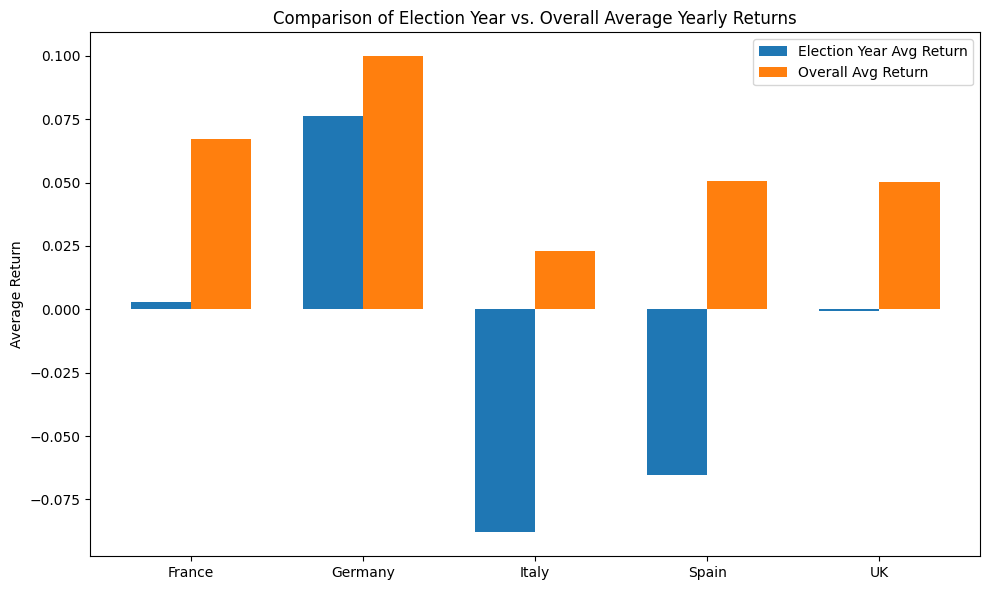

In [117]:
# Visualization 5: Comparison of Election Year vs. Overall Average Yearly Returns
pos = np.arange(len(comparison_df['Country']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(pos - width/2, comparison_df['Election Year Avg Return'], width, label='Election Year Avg Return')
plt.bar(pos + width/2, comparison_df['Average Yearly Return'], width, label='Overall Avg Return')

plt.ylabel('Average Return')
plt.title('Comparison of Election Year vs. Overall Average Yearly Returns')
plt.xticks(pos, comparison_df['Country'])
plt.legend()
plt.tight_layout()
plt.show()

In [118]:
# Main function: using all of our data in order to help the user make predictions for his invesment plans
def predict_investment_return(country, historical_data):
    """
    Predicts whether to invest in a market based on the country, election year status, political spectrum, and historical data.

    :param country: The country to predict for.
    :param historical_data: DataFrame containing historical average returns.
    :return: Prediction and expected return.
    :input: The user puts the country he want to invest in and then gives his preditcion
    """
    # Check if the country exists in the data
    if country not in historical_data['Country'].values:
        return "Wrong input - please put a relevant country", None

    # Filter the historical data for the given country
    country_data = historical_data[historical_data['Country'] == country]

    is_election_year = input("Is it an election year? (yes/no): ").lower() == 'yes'
    
    adjustment_factor = 0 
    
    # if statment for political spectrum
    if is_election_year:
        political_spectrum = input("Which political spectrum do you think will win the election? (left/centre/right): ").lower()
        if political_spectrum == 'centre':
            adjustment_factor = 0.05
        elif political_spectrum == 'left':
            adjustment_factor = 0.02
        elif political_spectrum == 'right':
            adjustment_factor = -0.02
        else:
            return "Wrong input - please choose a valid political spectrum (left/centre/right)", None
            
        avg_return = country_data['Election Year Avg Return'].iloc[0] + adjustment_factor
    else:
        avg_return = country_data['Average Yearly Return'].iloc[0]

    formatted_return = "{:.2%}".format(avg_return).lstrip('0')
    
    # Construct the advice message based on the return
    if avg_return < 0:
        advice = f"It's an election year in {user_country}, and based on a {political_spectrum} win,\nthe adjusted expected return suggests you might consider shorting the market. Expected Return: {formatted_return}"
    else:
        advice = f"It's an election year in {user_country}, and based on a {political_spectrum} win,\nthe adjusted expected return is {formatted_return}."

    return advice, avg_return

# usage
user_country = input("Enter the country: ") 
advice, expected_return = predict_investment_return(user_country, comparison_df)

print(advice)

It's an election year in Germany, and based on a centre win,
the adjusted expected return is 12.62%.


To conclude, 